In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
medicaldata = pd.read_csv('Health_insurance.csv')
medicaldata

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# Explore the data for higher level information

In [16]:
medicaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
medicaldata.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [20]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [21]:
medicaldata.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

# Visualization of Health Insurance dataset with all parameters

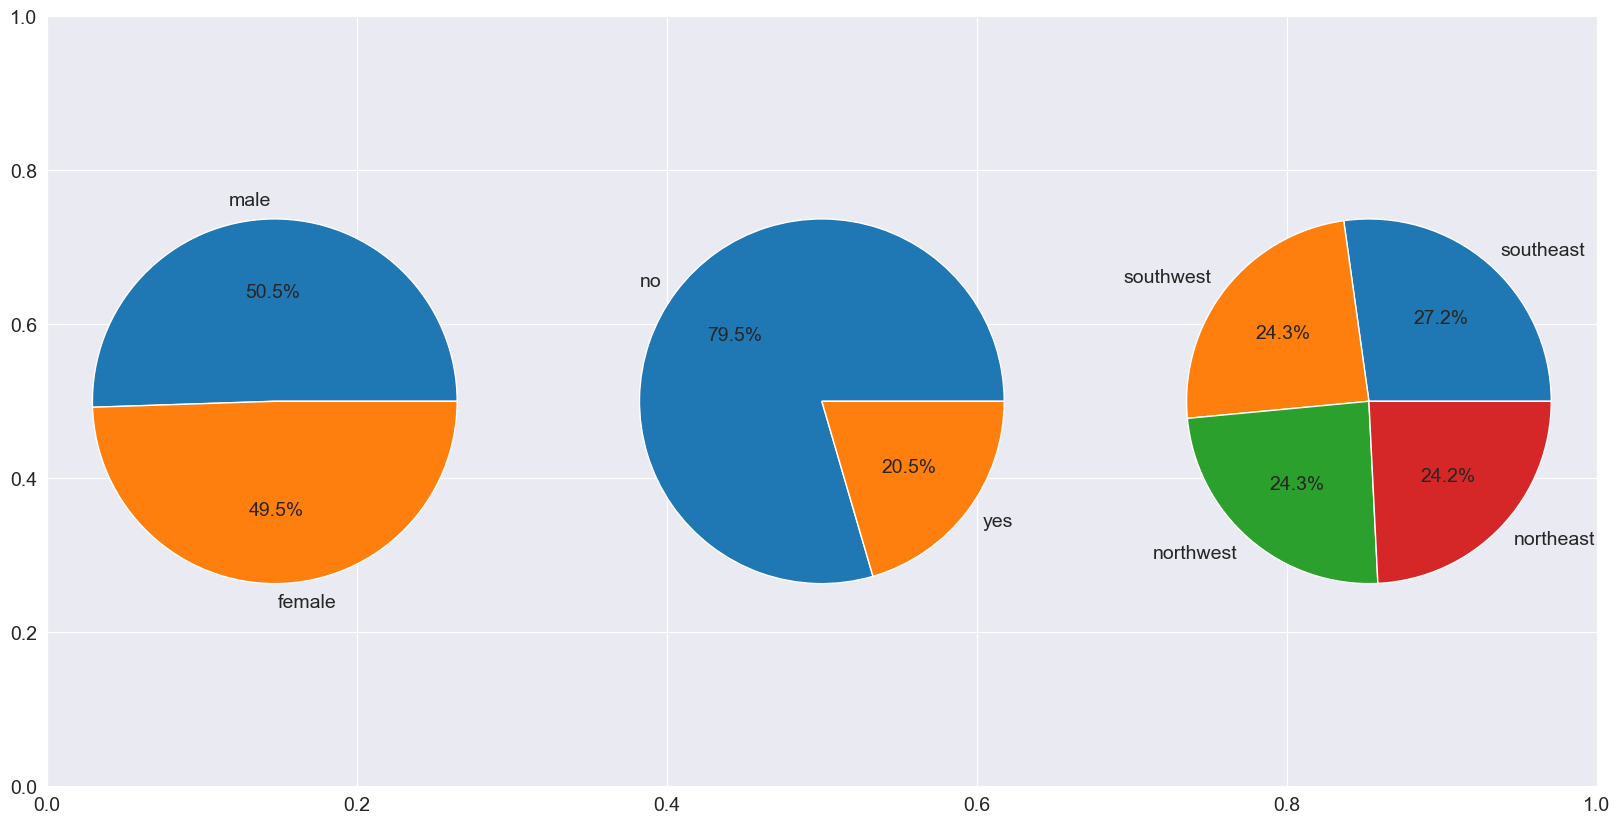

In [38]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = medicaldata[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

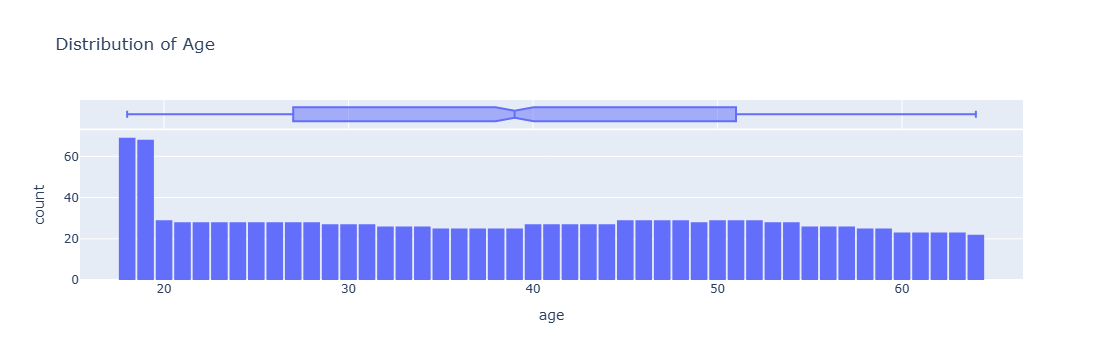

In [22]:
fig = px.histogram(medicaldata, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

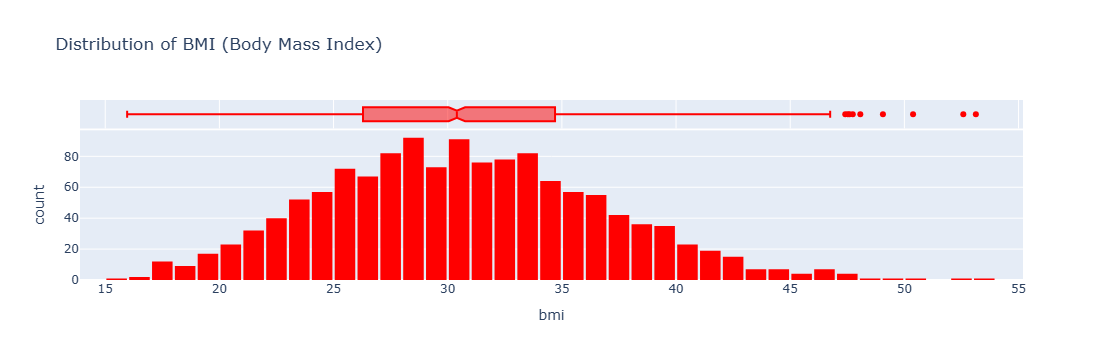

In [23]:
fig = px.histogram(medicaldata, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

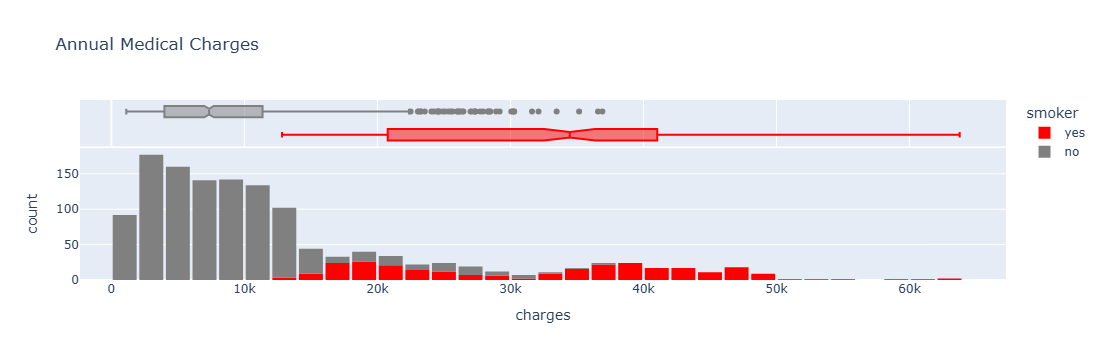

In [24]:
fig = px.histogram(medicaldata, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)

## Visualization of the distribution of medical charges in connection with other factors like "sex" and "region".

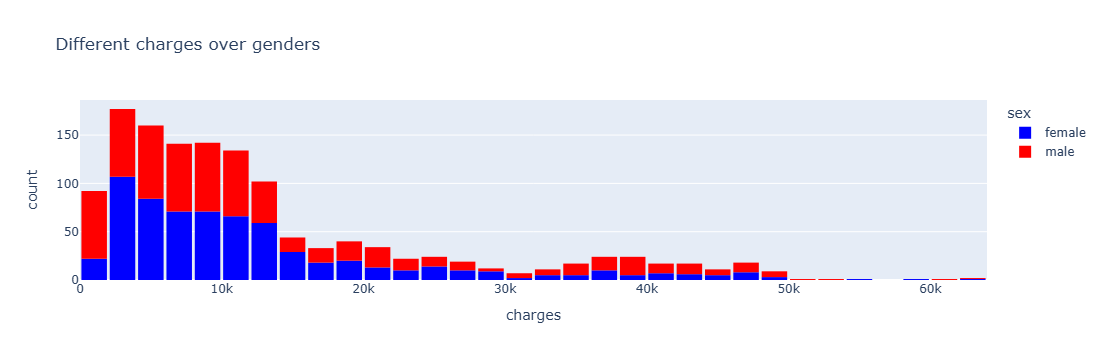

In [25]:
fig = px.histogram(medicaldata,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

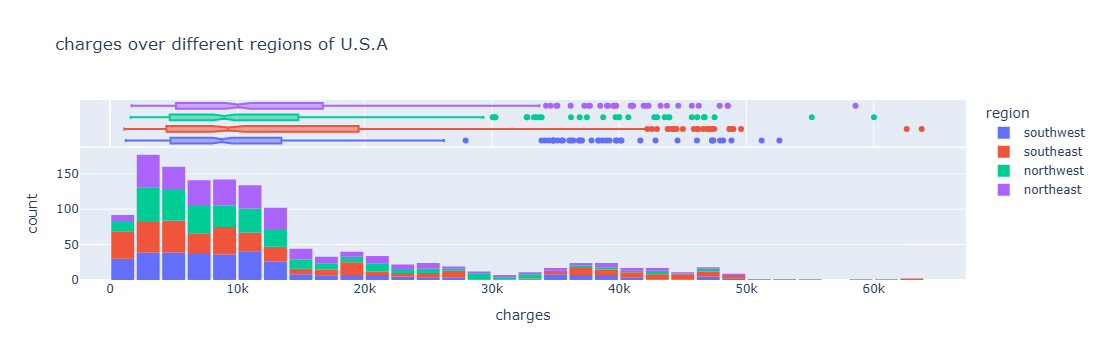

In [26]:
fig = px.histogram(medicaldata,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

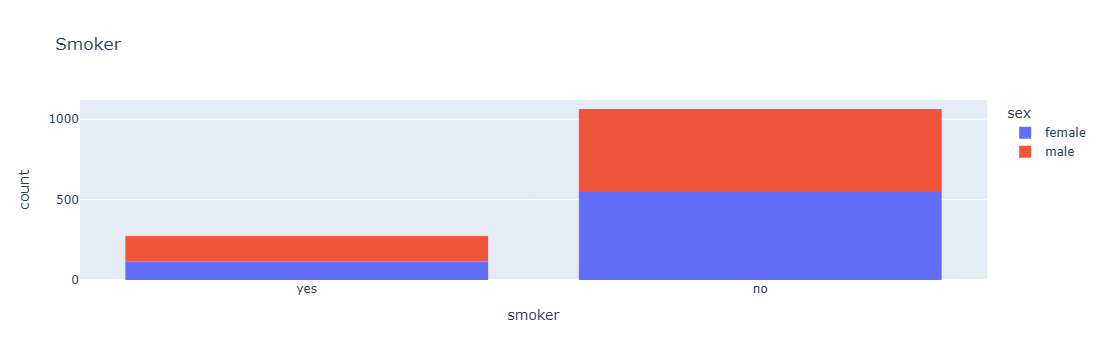

In [28]:
## Smoker
medicaldata.smoker.value_counts()
px.histogram(medicaldata, x='smoker', color='sex', title='Smoker')

## Visualization of the distributions of the "sex", "region" and "children" columns

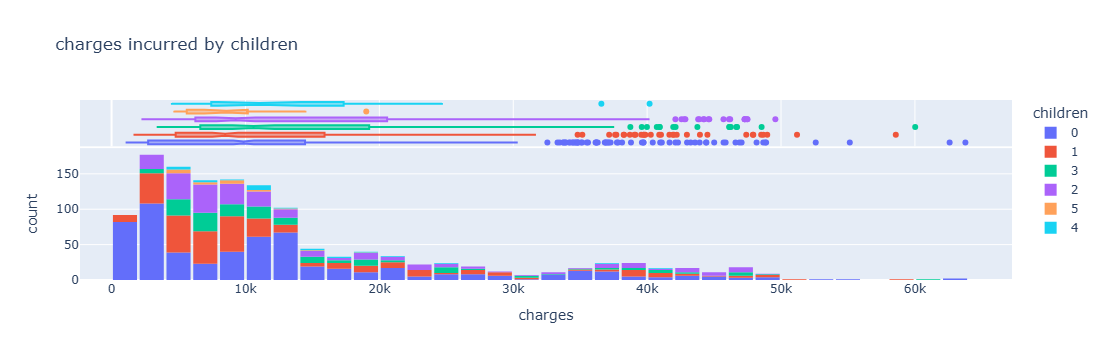

In [29]:
fig = px.histogram(medicaldata,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

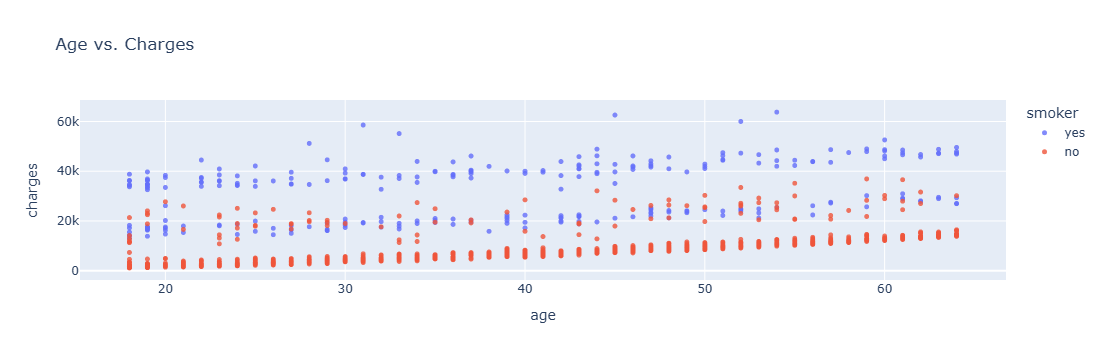

In [30]:
'''Age and Charges¶
Let's visualize the relationship between "age" and "charges" using a scatter plot. 
Each point in the scatter plot represents one customer. 
We'll also use values in the "smoker" column to color the points.
'''

fig = px.scatter(medicaldata, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()



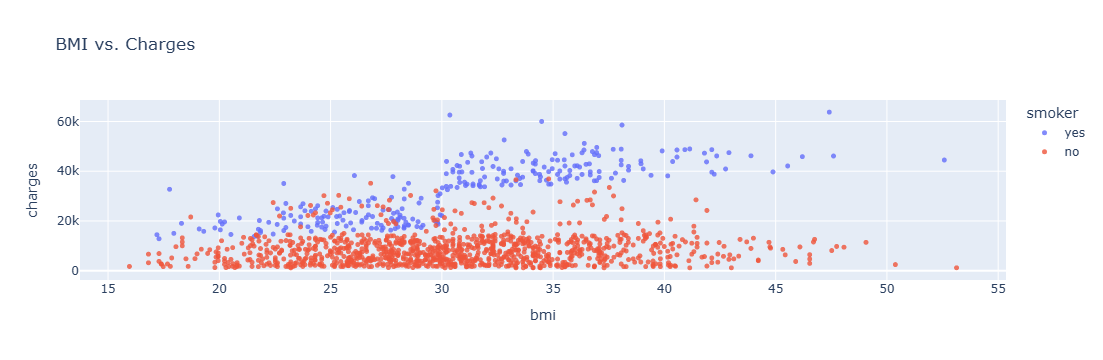

In [32]:
'''
BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. 
Once again, we'll use the values from the "smoker" column to color the points.
'''
fig = px.scatter(medicaldata, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()


## Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

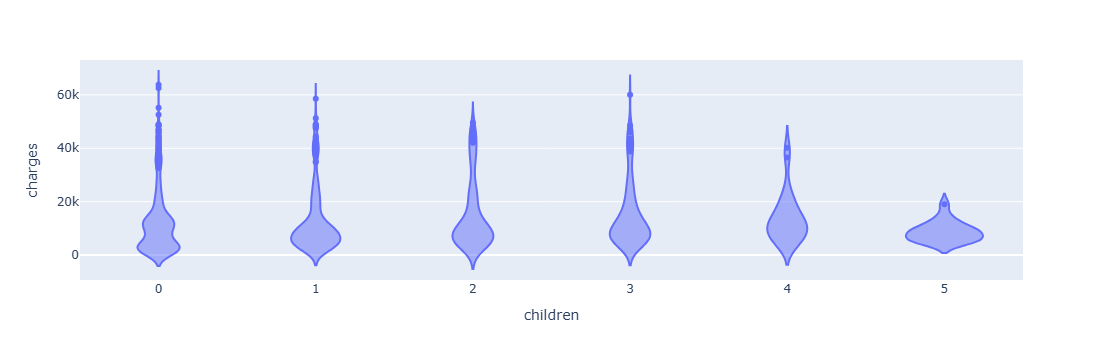

In [34]:
px.violin(medicaldata,x = 'children',y = 'charges')

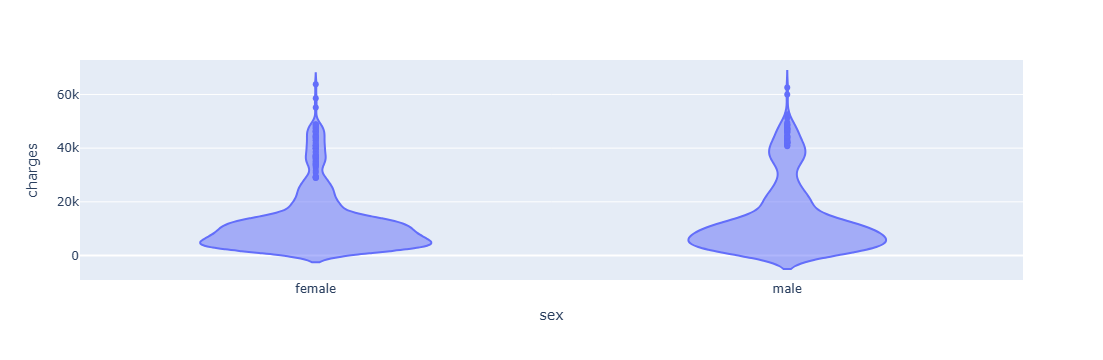

In [35]:
px.violin(medicaldata,x = 'sex',y = 'charges')

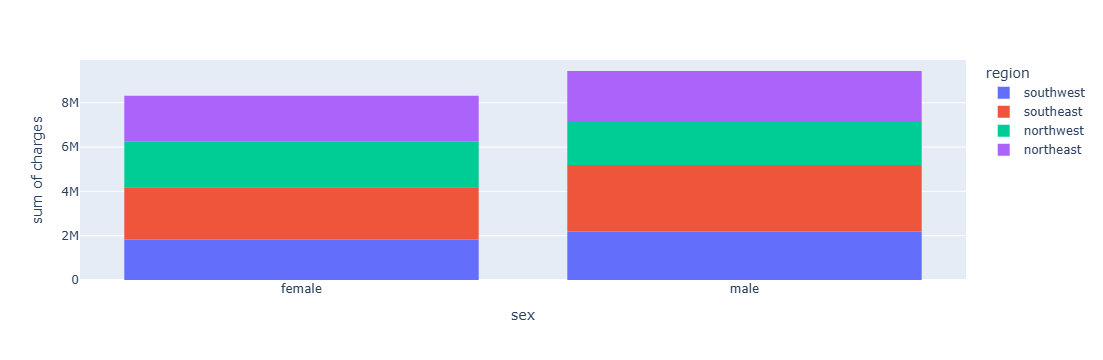

In [36]:
px.histogram(medicaldata,x='sex',y = 'charges',color = 'region')

## DATA PREPROCESSING

In [49]:
medicaldata.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

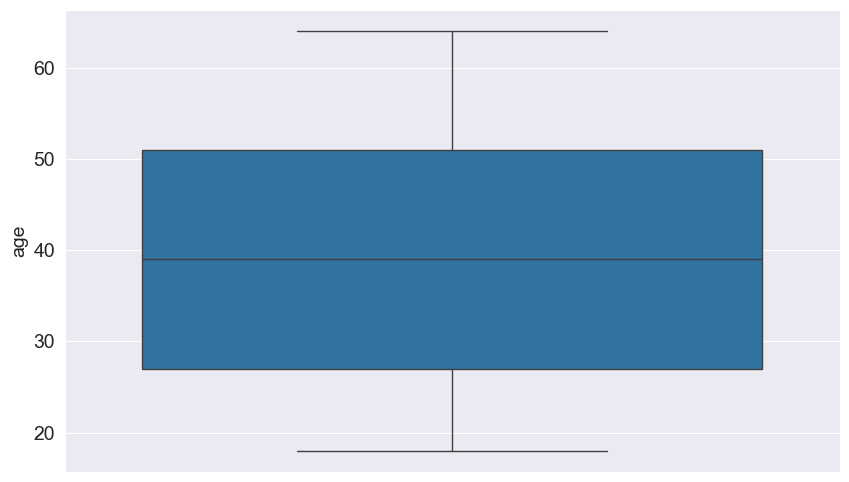

In [50]:
sns.boxplot(medicaldata['age'])

<Axes: ylabel='bmi'>

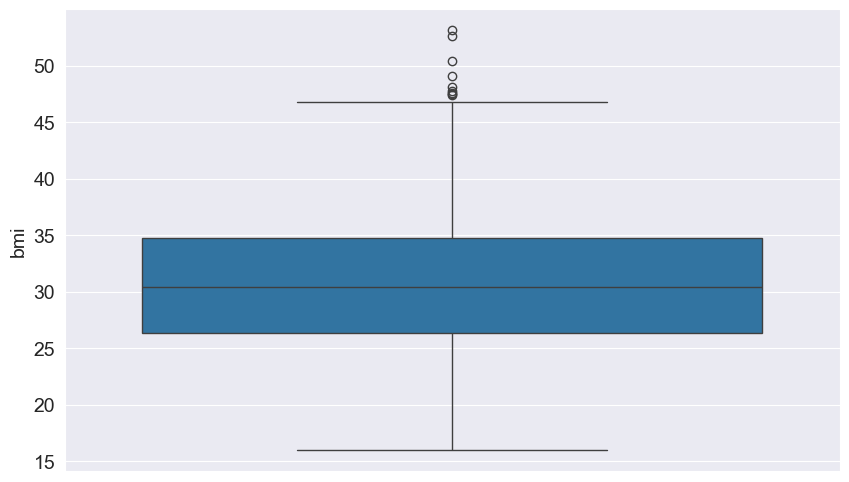

In [51]:
sns.boxplot(medicaldata['bmi'])


In [52]:
''' 
Due to the presence of outliers present in bmi column we need to treat the outliers by replacing 
the values with mean as the bmi column consists of continuous data.
'''
Q1=medicaldata['bmi'].quantile(0.25)
Q2=medicaldata['bmi'].quantile(0.5)
Q3=medicaldata['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)



13.674999999999994
47.31500000000001


## DATA WRANGLING

In [53]:
medicaldata['bmi'].skew()

0.28391419385321137

In [54]:
medicaldata['age'].skew()

0.054780773126998195

## Model Deployment

In [64]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# Separate features and target variable
X = medicaldata.drop(['charges'], axis=1)
Y = medicaldata[['charges']]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' or 'most_frequent'
X = imputer.fit_transform(X)

# Initialize lists to store results
l1 = []
l2 = []
l3 = []

# Loop for different random states
for i in range(40, 50):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)
    
    # Store scores
    l1.append(lrmodel.score(xtrain, ytrain))  # Training accuracy
    l2.append(lrmodel.score(xtest, ytest))    # Test accuracy
    
    # Cross-validation score
    cvs = cross_val_score(lrmodel, X, Y, cv=5).mean()
    l3.append(cvs)

# Create DataFrame to display results
df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3})
print(df1)


   train acc  test acc       cvs
0   0.123815  0.100524  0.116785
1   0.129250  0.033744  0.116785
2   0.109637  0.137480  0.116785
3   0.126696  0.088731  0.116785
4   0.110909  0.151797  0.116785
5   0.122089  0.093116  0.116785
6   0.116841  0.124412  0.116785
7   0.123715  0.090214  0.116785
8   0.119145  0.116731  0.116785
9   0.122068  0.102173  0.116785


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression")
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


Linear Regression
0.10963684231194992
0.13748020188497845
0.11678490448046067


In [68]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("SVR:")
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())


SVR:
-0.10059929836626313
-0.13368516463869007
-0.10360718139050569


In [74]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("RandomForestRegressor:")
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
print("Hyperparametertuning:")
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


RandomForestRegressor:
0.8460652714792329
-0.04241644649625176
-0.09367419595578785
Hyperparametertuning:
{'n_estimators': 50}
0.8454715536014769
-0.04249841021332745
-0.0908650433470404


In [76]:
gbmodel=GradientBoostingRegressor()
print("GradientBoostingRegressor:")
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
print("Hyperparametertuning")
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


GradientBoostingRegressor:
0.36209438149403916
0.017373595687102728
-0.015987814911334365
Hyperparametertuning
{'learning_rate': 0.2, 'n_estimators': 10}
0.2639639677861385
0.06433414198980625
0.05700851467810184


In [77]:
xgmodel=XGBRegressor()
print("XGBRegressor")
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
print("Hyperparametertuning")
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


XGBRegressor
0.9254949688911438
-0.2031632661819458
-0.2936167001724243
Hyperparametertuning
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.2577531933784485
0.08135563135147095
0.05508909225463867


## Visualization the model performance

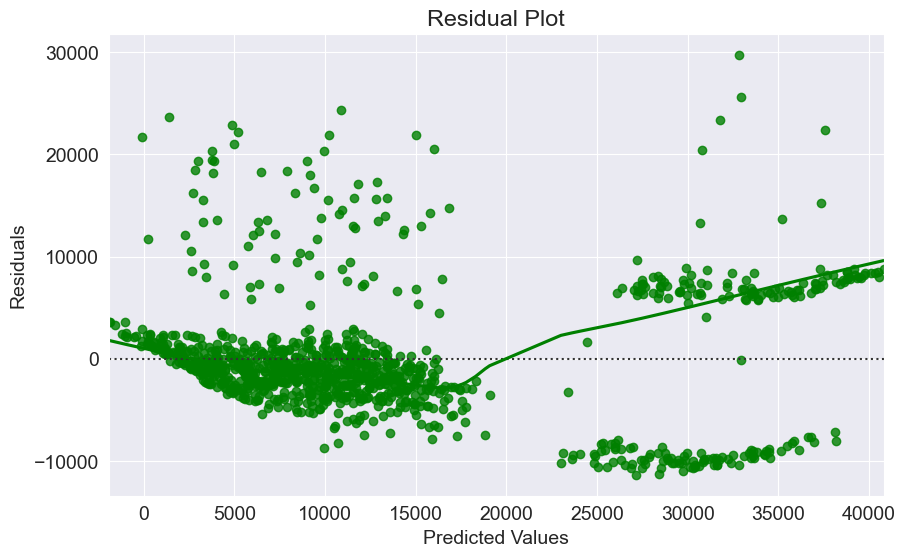

In [106]:
# 1. Residual Plot (Errors between actual and predicted values)
plt.figure(figsize=(10,6))
sns.residplot(x=ypred_train, y=ytrain - ypred_train, lowess=True, color='g')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

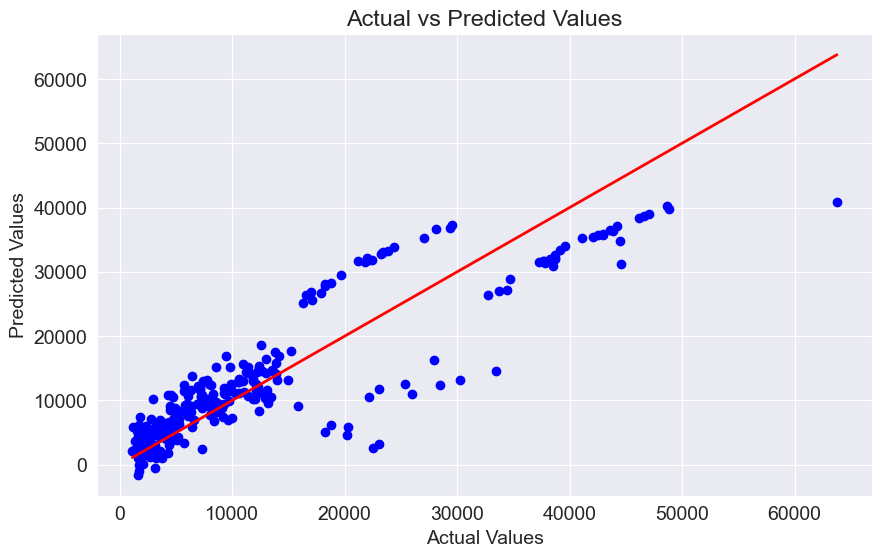

In [105]:
# 2. Actual vs Predicted Plot
plt.figure(figsize=(10,6))
plt.scatter(ytest, ypred_test, color='b')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='r', lw=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

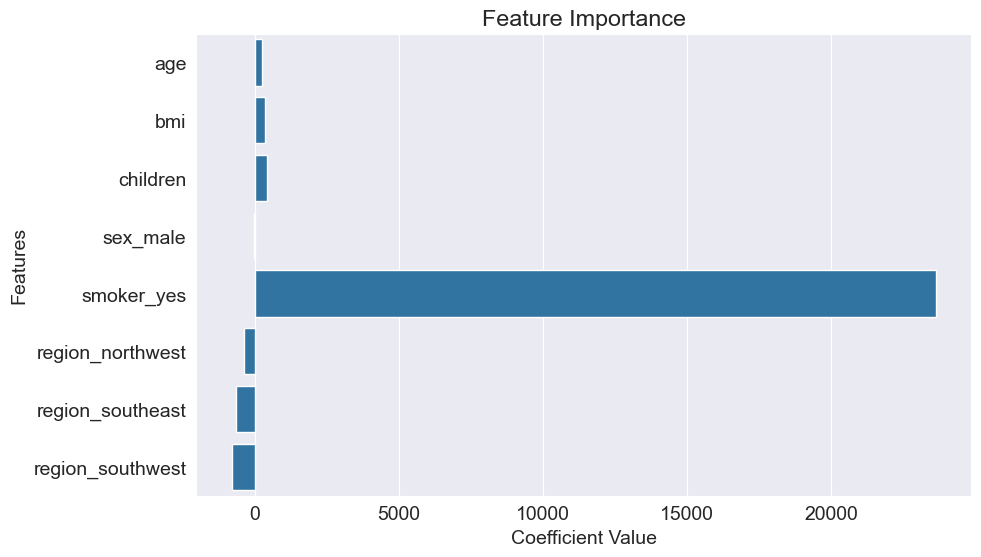

In [102]:
# 3. Feature Importance (Linear Regression Coefficients)
plt.figure(figsize=(10,6))
importance = lrmodel.coef_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

In [90]:
# Ensure the columns exist before dropping
if 'sex' in medicaldata.columns and 'region' in medicaldata.columns:
    medicaldata.drop(['sex', 'region'], axis=1, inplace=True)

# Drop 'charges' from X and Xf
Xf = medicaldata.drop(['charges'], axis=1)
X = medicaldata.drop(['charges'], axis=1)

# Splitting data
xtrain, xtest, ytrain, ytest = train_test_split(Xf, Y, test_size=0.2, random_state=42)

# Model training and prediction
finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
finalmodel.fit(xtrain, ytrain)

ypredtrain4 = finalmodel.predict(xtrain)
ypredtest4 = finalmodel.predict(xtest)

# Print performance metrics
print("Final Model:")
from sklearn.metrics import r2_score
print("Train accuracy:",r2_score(ytrain, ypredtrain4))
print("Test accuracy:",r2_score(ytest, ypredtest4))

# Cross-validation score
print("CV Score",cross_val_score(finalmodel, X, Y, cv=5).mean())


Final Model:
Train accuracy: 0.2577531933784485
Test accuracy: 0.08135563135147095
CV Score 0.05508909225463867


# Save Model

In [ ]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))

# Predict on new data:

In [ ]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([7218.8633], dtype=float32)